# Our First Lasagne NeuralNet

Now that we're familiar with Theano, we're ready to use Lasagne, a library that abstracts out a bit of the internal math required for different kinds of Neural Network layers. This notebook borrows heavily from [Colin Raffel's tutorial](https://github.com/craffel/Lasagne-tutorial/blob/master/examples/tutorial.ipynb), and we really recommend reading through his full tutorial if you want to explore the full functionality of Lasagne.

In [1]:
import theano
import theano.tensor as T
import lasagne
import numpy as np
import sklearn.datasets
from __future__ import print_function
import os
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display

/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


For this application, we're going to do a classification problem. Every NN we've done so far has been a regressor. Using NNs for classification is similar. Let's say you have two possible classes, "cat" and "dog". Then, you have one output neuron for each of the class possibilities. These neuron's activation functions are the softmax function, which essentially assigns a probability to each class label. The more active a neuron, the more confident our network is in the classification.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


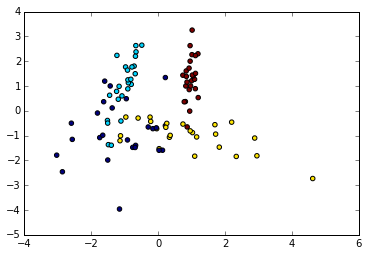

In [2]:
# Generate synthetic data
N_CLASSES = 4
X, y = sklearn.datasets.make_classification(
    n_features=2, n_redundant=0,
    n_classes=N_CLASSES, n_clusters_per_class=1)
# Convert to theano floatX
X = X.astype(theano.config.floatX)
# Labels should be ints
y = y.astype('int32')
# Make a scatter plot where color encodes class
plt.scatter(X[:, 0], X[:, 1], c=y)

We start with an input layer, which has as many neurons as features in the dataset. Same old.

In [3]:
l_in = lasagne.layers.InputLayer(shape=X.shape)

We'll have a hidden layer with 10 neurons, and then an output layer with 4 neurons, since there are 4 classes.

In [4]:
# We'll create a network with two dense layers: A tanh hidden layer and a softmax output layer.
l_hidden = lasagne.layers.DenseLayer(l_in, num_units=10, nonlinearity=lasagne.nonlinearities.tanh)
# For our output layer, we'll use a dense layer with a softmax nonlinearity.
l_output = lasagne.layers.DenseLayer(
    l_hidden, num_units=N_CLASSES, nonlinearity=lasagne.nonlinearities.softmax)

In [5]:
net_output = lasagne.layers.get_output(l_output)

We believe the following code is sufficiently commented

In [6]:
# As a loss function, we'll use Lasagne's categorical_crossentropy function.
# This allows for the network output to be class probabilities,
# but the target output to be integers denoting the class.
true_output = T.ivector('true_output')
loss = T.mean(lasagne.objectives.categorical_crossentropy(net_output, true_output))

In [7]:
# Retrieving all parameters of the network is done using get_all_params,
# which recursively collects the parameters of all layers connected to the provided layer.
all_params = lasagne.layers.get_all_params(l_output)
# Now, we'll generate updates using Lasagne's SGD function
updates = lasagne.updates.sgd(loss, all_params, learning_rate=1)
# Finally, we can compile Theano functions for training and computing the output.
# Note that because loss depends on the input variable of our input layer,
# we need to retrieve it and tell Theano to use it.
train = theano.function([l_in.input_var, true_output], loss, updates=updates)
get_output = theano.function([l_in.input_var], net_output)

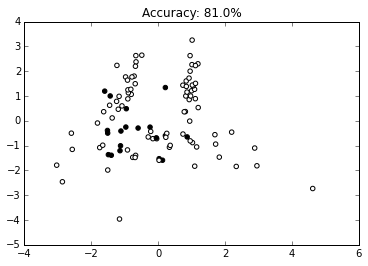

In [8]:
# Train for 100 epochs
for n in xrange(100):
    train(X, y)
    
# Compute the predicted label of the training data.
# The argmax converts the class probability output to class label
y_predicted = np.argmax(get_output(X), axis=1)
# Plot incorrectly classified points as black dots
plt.scatter(X[:, 0], X[:, 1], c=(y != y_predicted), cmap=plt.cm.gray_r)
# Compute and display the accuracy
plt.title("Accuracy: {}%".format(100*np.mean(y == y_predicted)))

This notebook was nearly completely copy-pasted from Colin Raffel's tutorial. However, we felt that by reading the code, making sure we understood each line, and running the code to see its outputs, we gained enough of an understanding of Lasagne to use (bake?) with it in future applications.